## GIZ/NGC PYTHON FOR DATA SCIENCE
### Precapstone Project 2 (using Customer list data)

#### Owolabi Moshood

In [130]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [131]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [132]:
df=pd.read_csv('2.2 Customer List.csv')
df.head()

,Customer ID,Gender,Age,Salary,Purchased
0,1,Male,19,19000,0
1,2,Male,35,20000,0
2,3,Female,26,43000,0
3,4,Female,27,57000,0
4,5,Male,19,76000,0


In [133]:
df.tail()

,Customer ID,Gender,Age,Salary,Purchased
395,396,Female,46,41000,1
396,397,Male,51,23000,1
397,398,Female,50,20000,1
398,399,Male,36,33000,0
399,400,Female,49,36000,1


In [134]:
df.describe()

,Customer ID,Age,Salary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,200.500000,37.655000,69742.500000,0.357500
std,115.614301,10.482877,34096.960282,0.479864
min,1.000000,18.000000,15000.000000,0.000000
25%,100.750000,29.750000,43000.000000,0.000000
50%,200.500000,37.000000,70000.000000,0.000000
75%,300.250000,46.000000,88000.000000,1.000000
max,400.000000,60.000000,150000.000000,1.000000


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
Customer ID    400 non-null int64
Gender         400 non-null object
Age            400 non-null int64
Salary         400 non-null int64
Purchased      400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


#### Visualizing

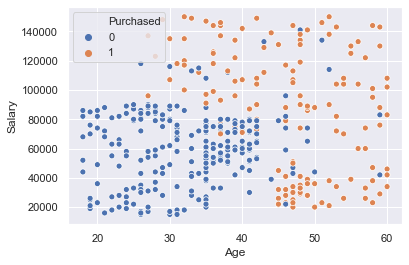

In [136]:
sns.scatterplot(x='Age', y='Salary', hue='Purchased', data=df)
plt.show()

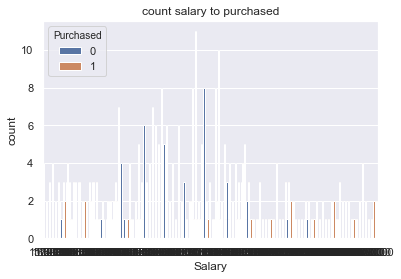

In [137]:
sns.countplot(data=df, x= 'Salary', hue='Purchased')
plt.title('count salary to purchased')
plt.show()

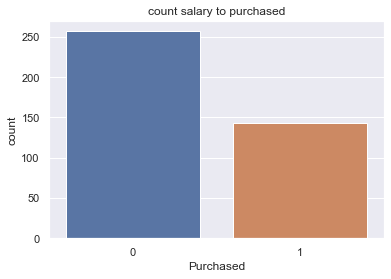

In [138]:
sns.countplot(df.Purchased)
plt.title('count salary to purchased')
plt.show()

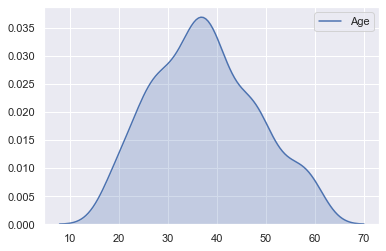

In [139]:
sns.kdeplot(df['Age'], shade = True)

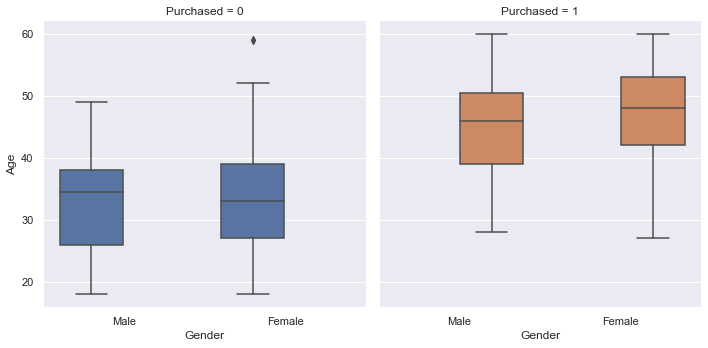

In [140]:
sns.catplot(x = 'Gender', y = 'Age', data = df, kind = 'box', hue = 'Purchased', col='Purchased')

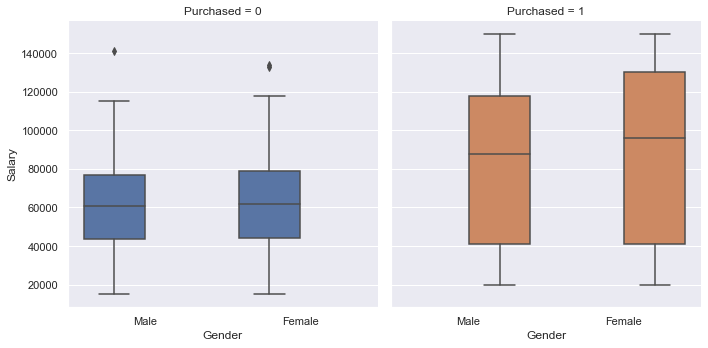

In [141]:
sns.catplot(x = 'Gender', y = 'Salary', data = df, kind = 'box', hue = 'Purchased', col='Purchased')

### Preprocessing

In [142]:
lb=LabelEncoder()
df['Gender'] = lb.fit_transform(df['Gender'])

In [143]:
df['Gender']

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int32

In [144]:
df.head()

,Customer ID,Gender,Age,Salary,Purchased
0,1,1,19,19000,0
1,2,1,35,20000,0
2,3,0,26,43000,0
3,4,0,27,57000,0
4,5,1,19,76000,0


In [145]:
x=df.drop(['Customer ID', 'Purchased'], axis=1)

In [146]:
x

,Gender,Age,Salary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [147]:

y=df['Purchased'].values.reshape(-1, 1)
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [148]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

#### Feature Scaling

In [149]:


scaler= StandardScaler()
X=scaler.fit_transform(x)
X

In [150]:
scaler=MinMaxScaler()
X= scaler.fit_transform(x)

### Building Model

- Split data in to train and test

In [151]:

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state= 42)

In [152]:
X_train

array([[0.        , 0.21428571, 0.31111111],
       [1.        , 0.66666667, 0.0962963 ],
       [0.        , 0.5       , 0.88148148],
       [0.        , 0.61904762, 0.17777778],
       [0.        , 0.92857143, 0.08148148],
       [1.        , 0.33333333, 0.77777778],
       [1.        , 0.54761905, 0.27407407],
       [1.        , 0.71428571, 0.43703704],
       [1.        , 0.19047619, 0.52592593],
       [1.        , 0.0952381 , 0.48888889],
       [1.        , 0.73809524, 0.52592593],
       [0.        , 0.42857143, 0.28888889],
       [1.        , 0.52380952, 0.32592593],
       [0.        , 0.54761905, 0.48148148],
       [1.        , 0.19047619, 0.00740741],
       [0.        , 0.5       , 0.47407407],
       [1.        , 0.97619048, 0.85185185],
       [1.        , 0.57142857, 0.36296296],
       [0.        , 0.83333333, 0.94814815],
       [1.        , 0.38095238, 0.71851852],
       [0.        , 0.92857143, 0.79259259],
       [0.        , 0.5       , 0.41481481],
       [1.

- Model
#### Using Random Forest Classifier

In [177]:
model=RandomForestClassifier(n_estimators=100)


In [178]:
model.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [179]:
y_pred=model.predict(X_test)

In [180]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [181]:
accuracy=metrics.accuracy_score(y_pred, y_test)
accuracy

0.9125

In [182]:
r2=r2_score(y_pred, y_test)
r2

0.6213657876943881

In [183]:
MSE= mean_squared_error(y_test, y_pred)
print('MSE: {}'. format(MSE))

MSE: 0.0875


### Using KNN

In [184]:
knn=KNeighborsClassifier()

In [185]:
knn.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [186]:
y_pred2=knn.predict(X_test)

In [163]:
y_pred2

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

In [164]:
accuracy= accuracy_score(y_pred2, y_test)
accuracy

0.925

In [165]:
r2=r2_score(y_pred2, y_test)
r2

0.6799999999999999

In [166]:
### acc_matr = confusion_matrix(y_test, y_pred2)

In [167]:
##acc_score = accuracy_score(y_test, y_pred2)
## acc_score

In [168]:
MSE= mean_squared_error(y_test, y_pred2)
print('MSE: {}'. format(MSE))

MSE: 0.075


In [188]:
purchased_0, purchased_1= df['Purchased'].value_counts()